# Importing Libraries

In [68]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

# preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.base import clone

# pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model development
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# performance metrics
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# deployment
import pickle

# warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
# setting background style for plots
sns.set_style('darkgrid')

In [70]:
donation= pd.read_csv('blood_don.csv')
donation.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [71]:
donation.shape

(576, 6)

In [72]:
donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [73]:
donation.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [74]:
donation.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [75]:
#dropping the column
donation.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
def transform_name(x):

    
    x= x.lower()
    x=x.replace(' ', '_')
    return x

In [77]:
# list of columns
column_names= list(donation.columns)

# transforming column names
column_names= map(lambda x: transform_name(x), column_names)
donation.columns=column_names

In [78]:
# cross checking column names
donation.head(3)

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1


In [79]:
# checking whether the target column is balanced
donation.made_donation_in_march_2007.value_counts()

made_donation_in_march_2007
0    438
1    138
Name: count, dtype: int64

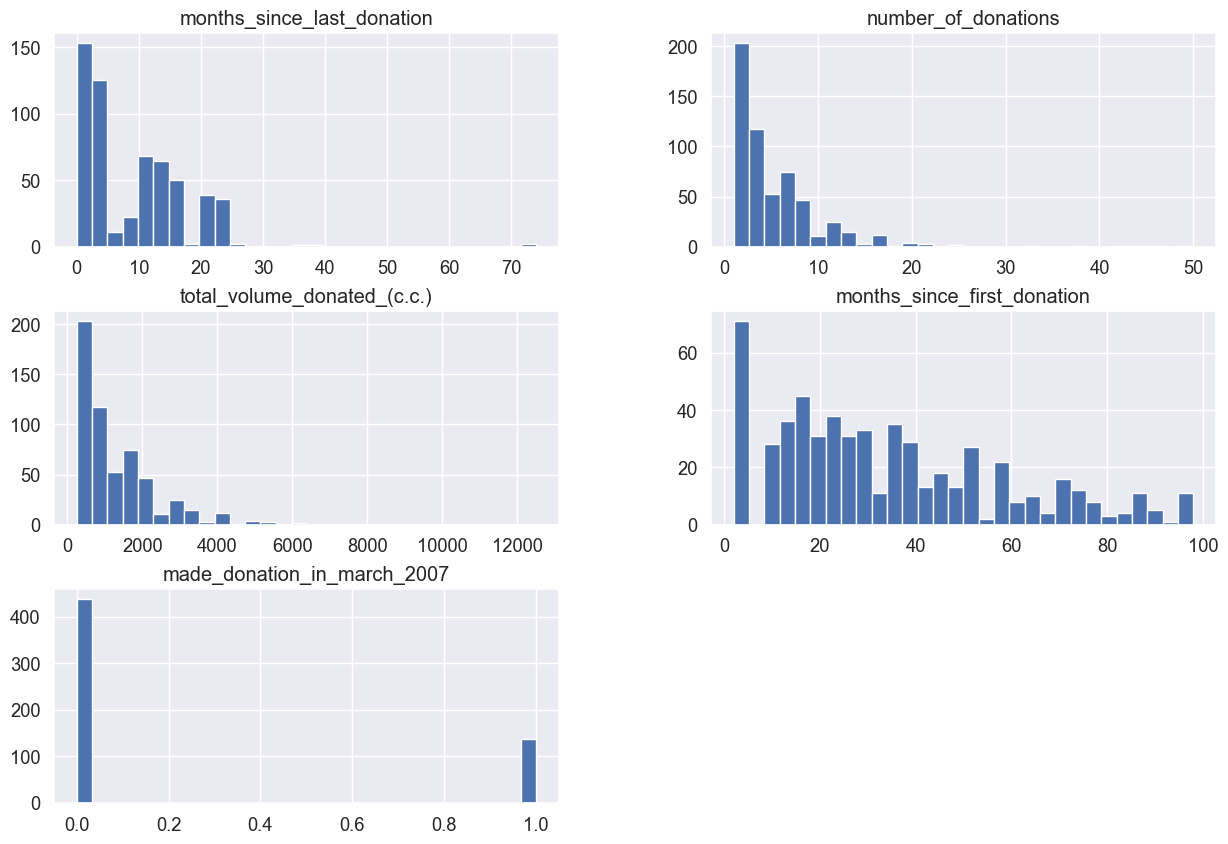

In [80]:
# UNIVARIATE ANALYSIS
donation.hist(bins=30, figsize=(15,10));

In [81]:
# splitting train and test set
donor_train, donor_test= train_test_split(donation, test_size=0.2, random_state=0)

In [82]:
print('donation', donation.shape)
print('donor_train', donor_train.shape)
print('donor_test', donor_test.shape)

donation (576, 5)
donor_train (460, 5)
donor_test (116, 5)


In [83]:
# creating a copy of both sets
train= donor_train.copy()
test=donor_test.copy()

# Exploratory Data Analysis

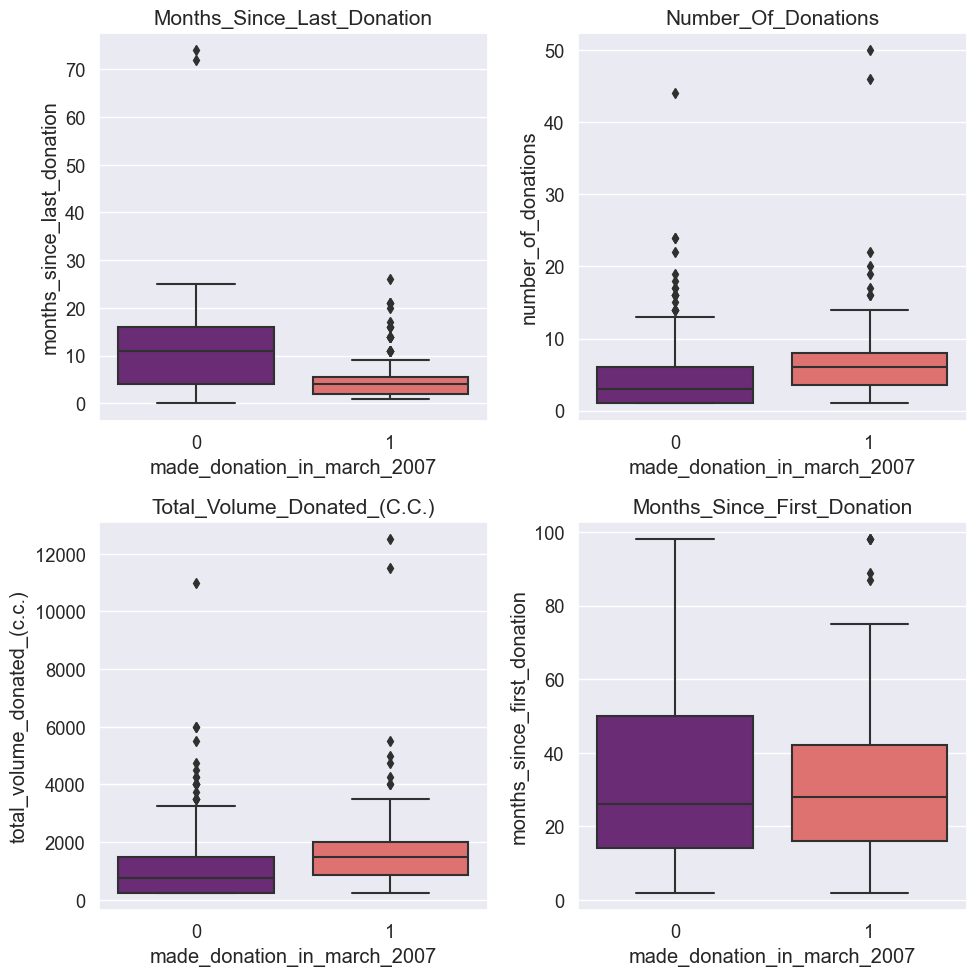

In [84]:
columns= list(train.columns)[:-1]

fig, ax= plt.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    sns.boxplot(y=col, x='made_donation_in_march_2007', data=train, palette='magma', ax=ax)
    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()

## Multivariate Analysis

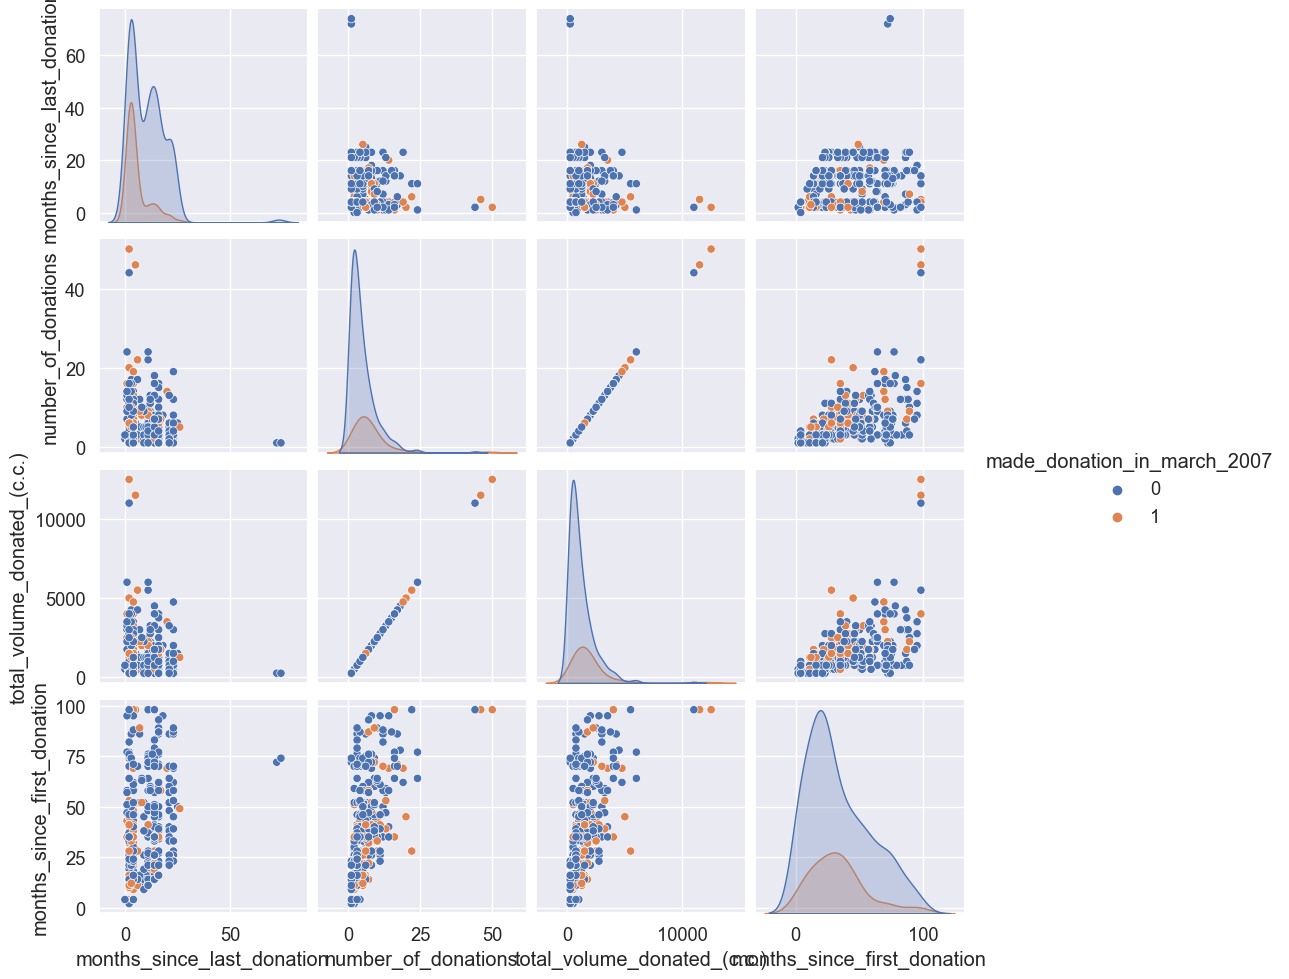

In [85]:
sns.pairplot(train, hue='made_donation_in_march_2007')

<Axes: >

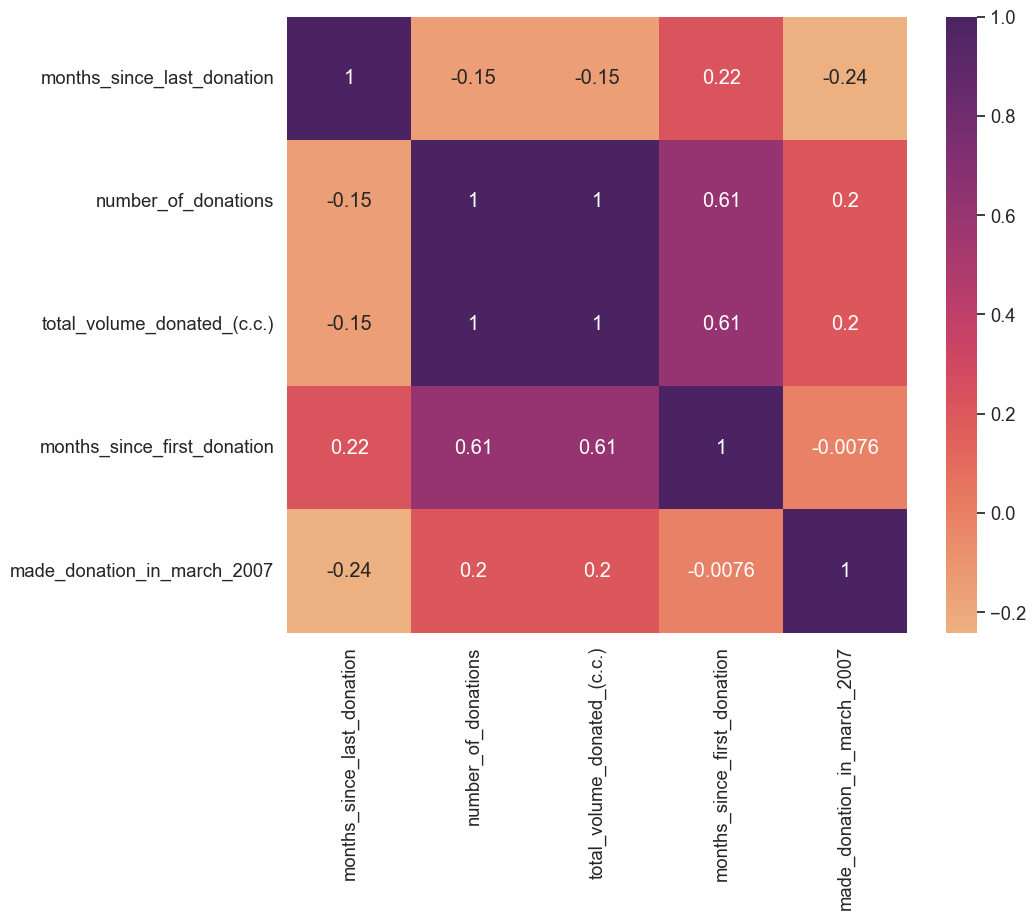

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, cmap='flare')

In [87]:
train.corr()['made_donation_in_march_2007']

months_since_last_donation    -0.240823
number_of_donations            0.202696
total_volume_donated_(c.c.)    0.202696
months_since_first_donation   -0.007590
made_donation_in_march_2007    1.000000
Name: made_donation_in_march_2007, dtype: float64

# Data Processing

# Missing values

In [88]:
train.isna().sum()

months_since_last_donation     0
number_of_donations            0
total_volume_donated_(c.c.)    0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

In [89]:
train[train.duplicated()]

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
356,21,1,250,21,0
347,21,1,250,21,0
357,21,1,250,21,0
140,2,1,250,2,0
172,4,1,250,4,0
...,...,...,...,...,...
174,4,1,250,4,0
314,16,1,250,16,0
472,4,1,250,4,0
70,2,6,1500,28,1


In [90]:
# train set
train.drop_duplicates(inplace=True)
# test set
test.drop_duplicates(inplace=True)

In [91]:
train.duplicated().sum()

0

# Checking Outliers

In [92]:
def find_outliers(col_name):

    
    Q1 = train[col_name].quantile(0.25)
    Q3 = train[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = train[(train[col_name] < lower_bound) | (train[col_name] > upper_bound)].index.tolist()
    
    return outliers


In [93]:
print('Percentage of Outliers in features:')
print('===========================================')
print('months_since_last_donation', np.round(len(find_outliers('months_since_last_donation'))/train.shape[0]*100,2),'%')
print('number_of_donations', np.round(len(find_outliers('number_of_donations'))/train.shape[0]*100,2),'%')
print('total_volume_donated_(c.c.)', np.round(len(find_outliers('total_volume_donated_(c.c.)'))/train.shape[0]*100,2),'%')
print('months_since_first_donation', np.round(len(find_outliers('months_since_first_donation'))/train.shape[0]*100, 2),'%')

Percentage of Outliers in features:
months_since_last_donation 0.59 %
number_of_donations 6.21 %
total_volume_donated_(c.c.) 6.21 %
months_since_first_donation 0.0 %


In [94]:
find_outliers('number_of_donations')==find_outliers('total_volume_donated_(c.c.)')

True

In [95]:
train.loc[find_outliers('number_of_donations')]['number_of_donations'].values

array([19, 22, 17, 46, 24, 24, 18, 16, 16, 16, 16, 17, 20, 16, 50, 22, 19,
       17, 44, 16, 16], dtype=int64)

## Feature Engineering

In [96]:
train_new=train.copy()

In [97]:
train_new['donation_period']=train_new['months_since_first_donation']-train_new['months_since_last_donation']

In [98]:
train_new.corr()['made_donation_in_march_2007']

months_since_last_donation    -0.251214
number_of_donations            0.120406
total_volume_donated_(c.c.)    0.120406
months_since_first_donation   -0.137525
made_donation_in_march_2007    1.000000
donation_period               -0.047653
Name: made_donation_in_march_2007, dtype: float64

<Axes: >

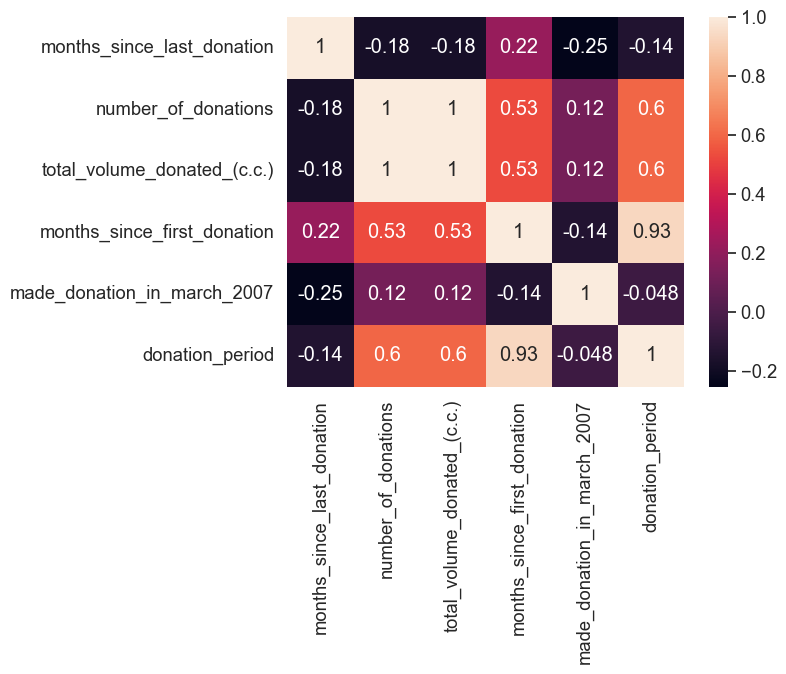

In [99]:
sns.heatmap(train_new.corr(), annot=True)

In [100]:
# train_set
X_train= train.drop('made_donation_in_march_2007', axis=1)
y_train=train['made_donation_in_march_2007']

# test_set
X_test= test.drop('made_donation_in_march_2007', axis=1)
y_test=test['made_donation_in_march_2007']

In [101]:
class DropAttribute(BaseEstimator, TransformerMixin):

    
    def __init__(self, attribute_names=None):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):


        # Set the attribute_names attribute to the value passed in the constructor
        self.attribute_names = self.attribute_names

        # Return self
        return self
    
    def transform(self, X, y=None):


        if self.attribute_names is None:
            return X
        
        else:
            new_df = X.drop(columns=self.attribute_names, errors='ignore')
            
            return new_df


In [102]:
class SkewnessTransformer(BaseEstimator, TransformerMixin):


    def __init__(self, method=None, columns=None):
        self.method = method
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        # Making a copy of the DataFrame to avoid modifying the original data
        transformed_df = X.copy()

        # Checking if the method argument is valid
        valid_methods = [None, 'boxcox', 'log', 'sqrt', 'inv', 'power', 'quantile']
        if self.method not in valid_methods:
            raise ValueError(f"Invalid method argument. Must be one of {valid_methods}.")

        # Checking if the columns argument is valid
        if isinstance(self.columns, str):
            self.columns = [self.columns]
        elif self.columns is None:
            self.columns = transformed_df.columns
        elif not isinstance(self.columns, list):
            raise TypeError("Columns argument must be a string or a list of strings.")

        # Looping through the selected columns and apply the specified transformation method
        for col in self.columns:
            if col in transformed_df.columns:
                if self.method == 'boxcox':
                    # Add 1 to each value to avoid taking log of 0 or negative values
                    transformed_col, _ = boxcox(transformed_df[col] + 1)
                elif self.method == 'log':
                    transformed_col = np.log(transformed_df[col])
                elif self.method == 'sqrt':
                    transformed_col = np.sqrt(transformed_df[col])
                elif self.method == 'inv':
                    transformed_col = 1 / transformed_df[col]
                elif self.method == 'power':
                    transformed_col = np.power(transformed_df[col], 2)
                elif self.method == 'quantile':
                    transformed_col = np.quantile(transformed_df[col], np.linspace(0, 1, len(transformed_df[col])), interpolation='nearest')
                elif self.method == None:
                    transformed_col= transformed_df[col]

                # Replacing the original column with the transformed column
                transformed_df[col] = transformed_col

        return transformed_df


In [103]:
scaler= StandardScaler()

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=None, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])


In [105]:
# Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

In [106]:
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(338, 3)
(108, 3)


In [107]:
smote=SMOTE(random_state=42, sampling_strategy='auto')

In [108]:
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

In [109]:
y_train.value_counts()

made_donation_in_march_2007
0    246
1     92
Name: count, dtype: int64

In [110]:
y_smote.value_counts()

made_donation_in_march_2007
0    246
1    246
Name: count, dtype: int64

In [111]:
def check_result(test, pred):
  """
    Prints out the classification report, accuracy score, precision score, F1 score, ROC AUC score, and confusion matrix
    for a given set of test and predicted labels.

    Args:
        test (array-like of shape (n_samples,)): Ground truth (correct) target values.
        pred (array-like of shape (n_samples,)): Estimated targets as returned by a classifier.

    Returns:
        None
    """
    
  print(classification_report(test, pred))
  print('=========================================')
  print('Accuracy', accuracy_score(test, pred))
  print('=========================================')
  print('precision', precision_score(test, pred))
  print('=========================================')
  print('F1 score', f1_score(test, pred))
  print('=========================================')
  print('ROC AUC score', roc_auc_score(test, pred))
  print('=========================================')
  print('Confusion matrix')
  print(confusion_matrix(test, pred))

In [112]:
def check_tradeoffs(ml_model, X, y, cv=5, threshold_proba=0.5):

    y_probas = cross_val_predict(ml_model, X, y, cv=cv, method='predict_proba')

    #selecting probabilities of positive class
    y_probas_donor = y_probas[:,1]
    
    # finding FPR, TPR, and threshold
    false_positive_rate, true_positive_rate, threshold = roc_curve(y, y_probas_donor)

    # Plotting Recall and Precision tradeoff
    precision, recall, threshold= precision_recall_curve(y, y_probas_donor)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(threshold, precision[:-1], color='m', label='precision')
    plt.plot(threshold, recall[:-1], color='c', label='recall')
    plt.annotate('Current_Threshold_Line', (threshold_proba, 0.5), (0.2, 0.3),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
    plt.axvline(threshold_proba, alpha=0.5)
    plt.xlabel('Threshold')
    plt.ylabel('Precision & Recall')
    plt.legend()
    plt.title('Precision-Recall Tradeoff'.title(), fontsize=20);

    # Plotting ROC AUC Curve
    plt.subplot(1,2,2)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color="c")
    plt.plot([0,1], [0,1], "r--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title('ROC AUC Curve'.title(), fontsize=20);
    plt.tight_layout()

    # Finding ROC AUC score
    print('ROC AUC Score is: ', roc_auc_score(y, y_probas_donor))


In [113]:
def opt_threshold(classifier, train_features, train_labels, test_features, test_labels):

    # Create a list of threshold values to test
    threshold_list=list(np.arange(0,1, 0.02))
    
    # Initialize an empty list to store F1 scores for each threshold value
    f1_scores=[]

    # Loop through the threshold values and calculate F1 scores for each
    for num, threshold_val in enumerate(threshold_list):

        # Create a new instance of the classifier with the current threshold
        model = classifier

        # Train the model on the training data
        model.fit(train_features, train_labels)

        # Get the predicted probabilities of each class on the test data
        y_proba = model.predict_proba(test_features)

        # Set the thresholds based on the current threshold value
        y_pred_new = (y_proba[:, 1] >= threshold_val).astype(int)

        # Calculate the F1 score for the current threshold value
        f1_score_val = f1_score(test_labels, y_pred_new)

        # Append the F1 score to the list of F1 scores
        f1_scores.append(f1_score_val)

    # Plot the F1 scores for each threshold value
    plt.plot(threshold_list, f1_scores, color='r')

    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 scores for different Thresholds')
    
    # Print the maximum F1 score and the optimum threshold value
    print('Max F1 score is: ', np.max(f1_scores))
    index= np.argmax(f1_scores)
    opt_threshold=threshold_list[index]
    print('Optimum threshold is: ', opt_threshold)


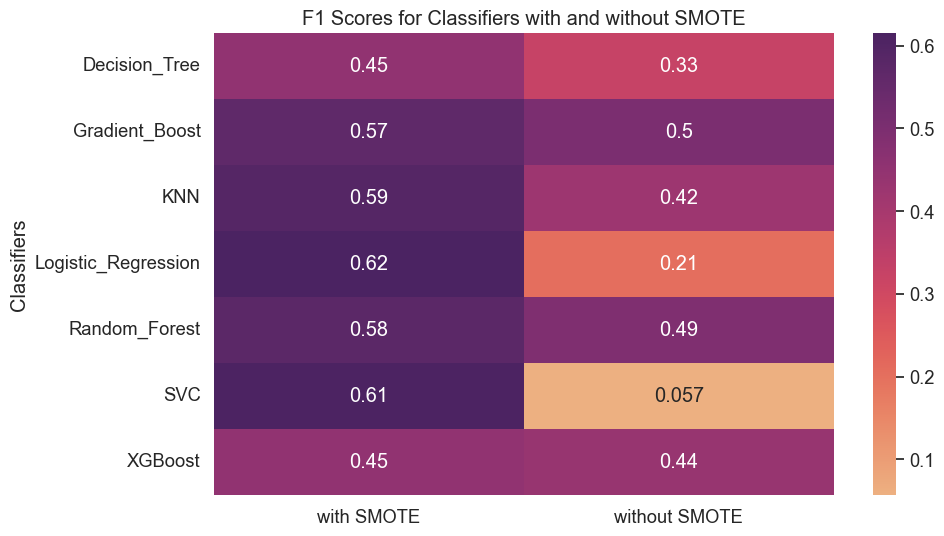

In [114]:
classifiers = {'Logistic_Regression': LogisticRegression(),
               'SVC': SVC(),
               'KNN': KNeighborsClassifier(),
               'Decision_Tree': DecisionTreeClassifier(),
               'Random_Forest': RandomForestClassifier(),
               'Gradient_Boost': GradientBoostingClassifier(),
               'XGBoost': XGBClassifier()}


# Define result dictionary to store precision scores
result_dict = {'Classifiers': [], 'with SMOTE': [], 'without SMOTE': []}

# Loop through classifiers and get F1 scores with and without SMOTE
for name, clf in classifiers.items():
    # without SMOTE
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    f1_nosmote = f1_score(y_test, y_pred)
    result_dict['Classifiers'].append(name)
    result_dict['without SMOTE'].append(f1_nosmote)
    
    # with SMOTE
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test_transformed)
    f1_smote = f1_score(y_test, y_pred)
    result_dict['with SMOTE'].append(f1_smote)

# Create pivot table with mean precision scores for each classifier
result_df = pd.DataFrame(result_dict)
pivot_table = result_df.pivot_table(index='Classifiers', values=['with SMOTE', 'without SMOTE'], aggfunc='mean')

# Heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='flare')
plt.title('F1 Scores for Classifiers with and without SMOTE');

In [115]:
models= {'Logistic_Regression': LogisticRegression(), 'SVC': SVC(), 'KNN': KNeighborsClassifier(), 
        'Decision_Tree': DecisionTreeClassifier(), 'Random_Forest': RandomForestClassifier(), 
        'Gradient_Boost': GradientBoostingClassifier(), 'XGBoost': XGBClassifier()}

f1_scores=[]
df_scores= {}

for name, model in zip(models.keys(), models.values()):
        kf= KFold(n_splits=5, shuffle=True, random_state=42)
        scorer=make_scorer(f1_score)
        cv_scores= cross_val_score(model, X_smote, y_smote, cv=kf, scoring=scorer)
        f1_scores.append(cv_scores)
        df_scores[name]= cv_scores

scoring_grid=pd.DataFrame.from_dict(df_scores)
scoring_grid.index=['CV1', 'CV2', 'CV3', 'CV4', 'CV5']
scoring_grid

,Logistic_Regression,SVC,KNN,Decision_Tree,Random_Forest,Gradient_Boost,XGBoost
CV1,0.666667,0.680412,0.666667,0.796296,0.720000,0.757282,0.769231
CV2,0.684685,0.686275,0.711538,0.673913,0.712644,0.733333,0.760870
CV3,0.724138,0.709091,0.752137,0.666667,0.752294,0.740741,0.770642
CV4,0.694737,0.651685,0.679245,0.627907,0.602410,0.688172,0.620690
CV5,0.687500,0.688172,0.700000,0.688889,0.711111,0.723404,0.719101


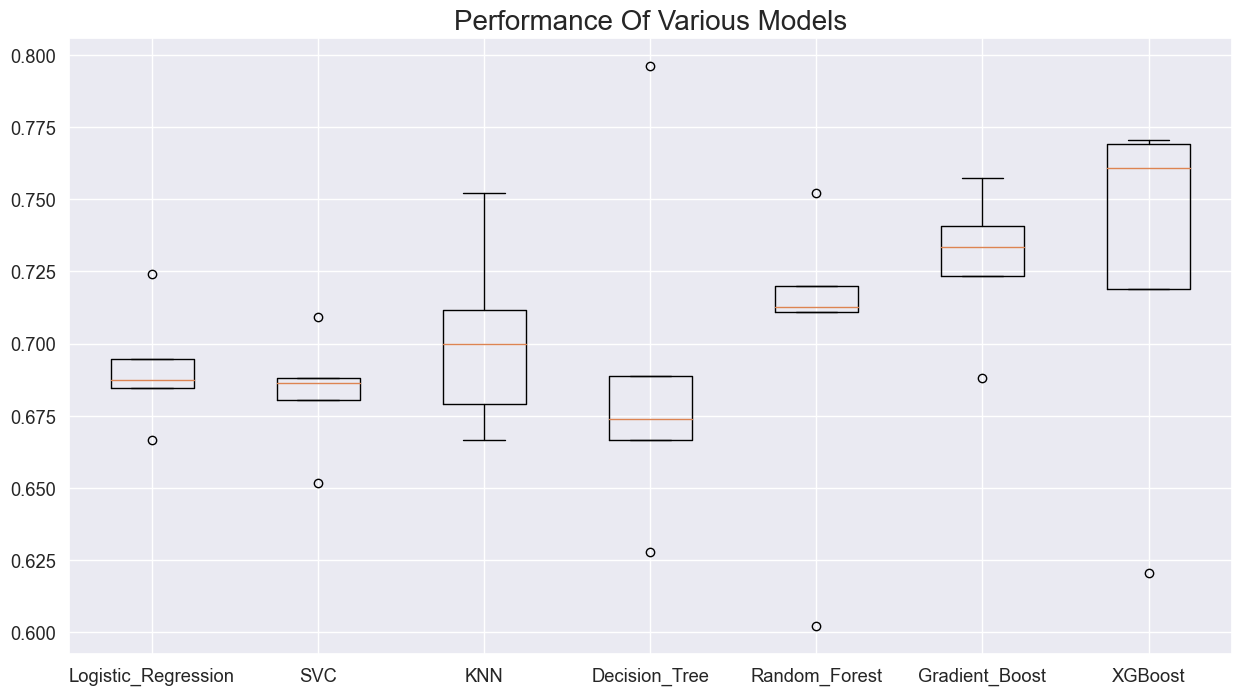

In [116]:
plt.figure(figsize=(15,8))
plt.boxplot(f1_scores, labels=models.keys())
plt.title('Performance of various models'.title(), fontsize=20);

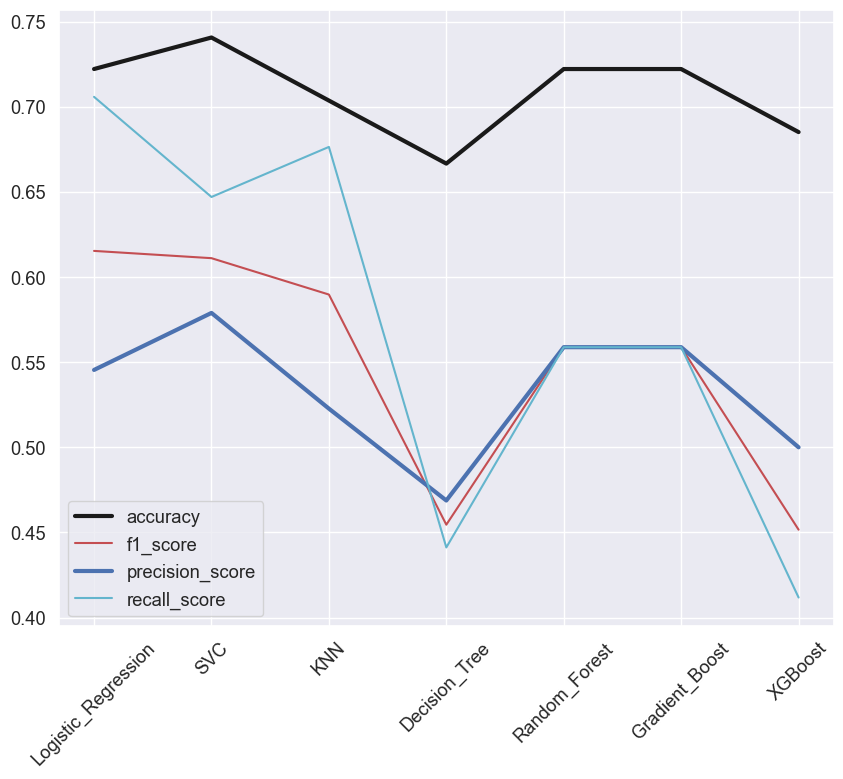

In [117]:
models= {'Logistic_Regression': LogisticRegression(), 'SVC': SVC(), 'KNN': KNeighborsClassifier(), 
        'Decision_Tree': DecisionTreeClassifier(), 'Random_Forest': RandomForestClassifier(), 
        'Gradient_Boost': GradientBoostingClassifier(), 'XGBoost': XGBClassifier()}

accuracy_scores={}
f1_scores={}
precision_scores= {}
recall_scores= {}

for name, model in zip(models.keys(), models.values()):
       model.fit(X_smote, y_smote)
       y_pred= model.predict(X_test_transformed)
       accuracy= accuracy_score(y_test, y_pred)
       f1=f1_score(y_test, y_pred)
       precision= precision_score(y_test, y_pred)
       recall=recall_score(y_test, y_pred)

       accuracy_scores[name]=accuracy
       f1_scores[name]=f1
       precision_scores[name]=precision
       recall_scores[name]=recall

plt.figure(figsize=(10,8))
plt.plot(f1_scores.keys(), accuracy_scores.values(), color='k', linewidth=3)
plt.plot(f1_scores.keys(), f1_scores.values(), color='r')
plt.plot(precision_scores.keys(), precision_scores.values(), color='b', linewidth=3)
plt.plot(recall_scores.keys(), recall_scores.values(), color='c')
plt.legend(['accuracy', 'f1_score', 'precision_score', 'recall_score'])
plt.xticks(rotation=45)
plt.show()

In [118]:
methods = [None, 'boxcox', 'sqrt', 'power', 'quantile']

method_f1_scores={}
method_accuracy_scores={}
for method in methods:
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=method, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Transforming Train_set and Test_set
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # SMOTE
    X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

    # SVC model
    model = SVC()
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test_transformed)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    method_f1_scores[method]=f1
    method_accuracy_scores[method]=accuracy



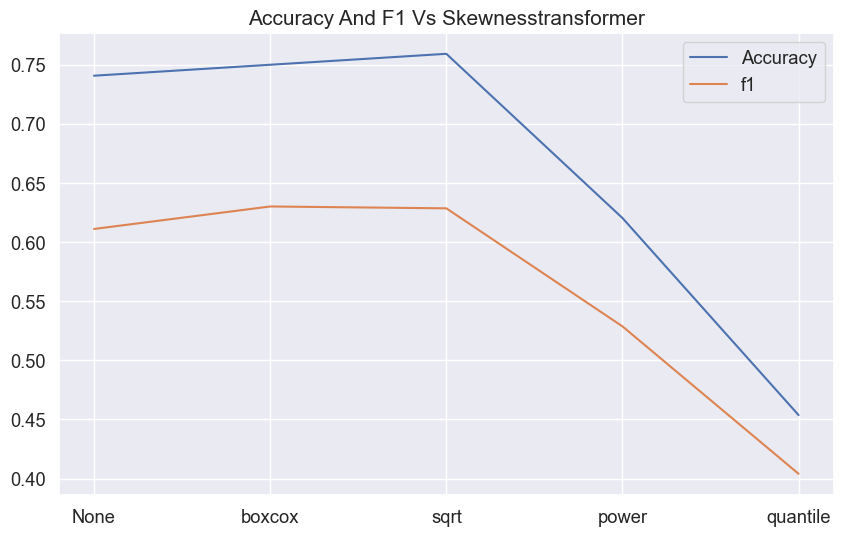

In [119]:
plt.figure(figsize=(10,6))

plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_accuracy_scores.values()), label='Accuracy')
plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_f1_scores.values()), label='f1')

plt.title('Accuracy and F1 vs SkewnessTransformer'.title(), fontsize=15)
plt.legend();


In [120]:
# setting skewness transformation method to 'sqrt' 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method='sqrt', columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

# SMOTE
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)


In [121]:
svc_before_tuning = SVC(probability=True)
svc_before_tuning.fit(X_smote, y_smote)
y_pred = svc_before_tuning.predict(X_test_transformed)

In [122]:
check_result(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.61      0.65      0.63        34

    accuracy                           0.76       108
   macro avg       0.72      0.73      0.73       108
weighted avg       0.76      0.76      0.76       108

Accuracy 0.7592592592592593
precision 0.6111111111111112
F1 score 0.6285714285714287
ROC AUC score 0.7289348171701112
Confusion matrix
[[60 14]
 [12 22]]


ROC AUC Score is:  0.7243125784916385


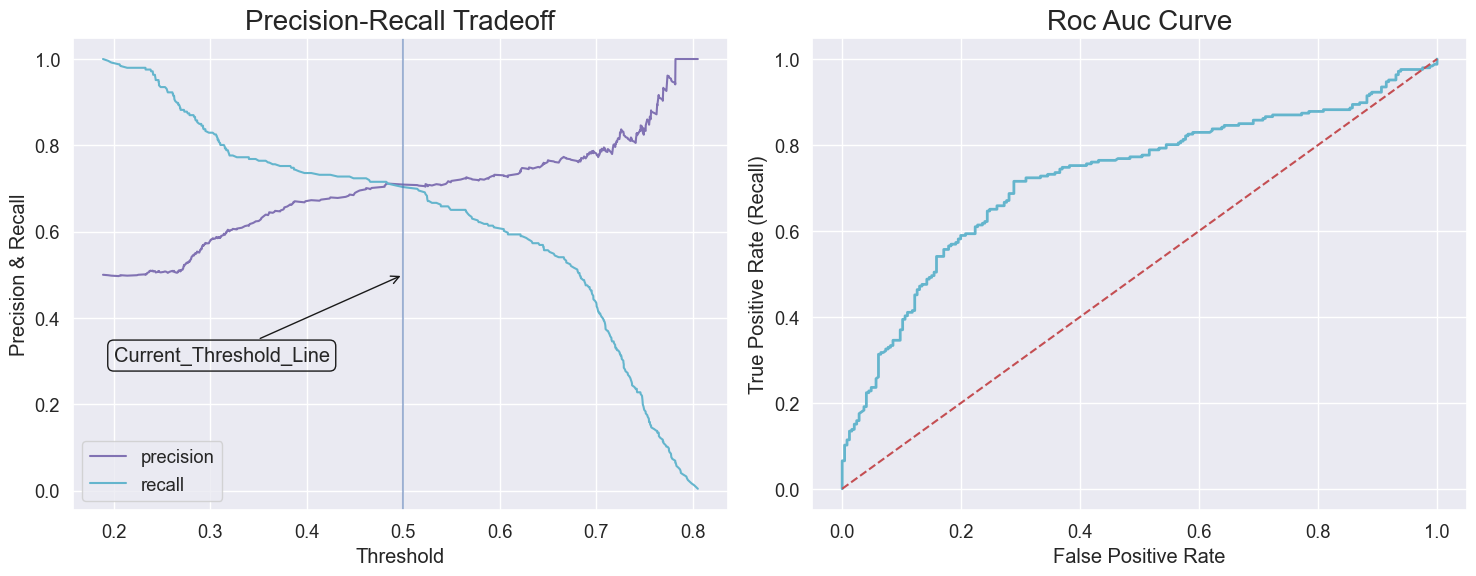

In [123]:
check_tradeoffs(svc_before_tuning, X_smote, y_smote, cv=5, threshold_proba=0.50)

In [124]:
svc_threshold= SVC(probability=True)

Max F1 score is:  0.6388888888888888
Optimum threshold is:  0.44


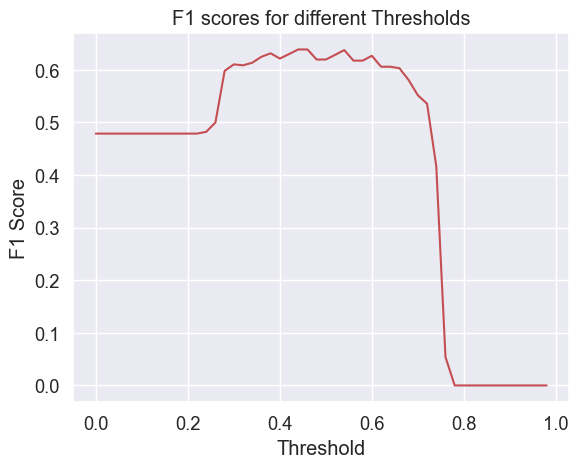

In [125]:
# finding optimum threshold value for SVC classifier
opt_threshold(svc_threshold, train_features=X_smote, train_labels=y_smote, test_features=X_test_transformed, test_labels=y_test)

In [126]:
# Training the model on the training data
svc_threshold.fit(X_smote, y_smote)

# Getting the predicted probabilities of each class
y_proba = svc_threshold.predict_proba(X_test_transformed)

# Setting the threshold for class 1 to 0.44
threshold = 0.44
y_pred_new_svc = (y_proba[:, 1] >= threshold).astype(int)

In [127]:
check_result(y_test, y_pred_new_svc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        74
           1       0.61      0.68      0.64        34

    accuracy                           0.76       108
   macro avg       0.72      0.74      0.73       108
weighted avg       0.77      0.76      0.76       108

Accuracy 0.7592592592592593
precision 0.6052631578947368
F1 score 0.6388888888888888
ROC AUC score 0.7368839427662958
Confusion matrix
[[59 15]
 [11 23]]


In [128]:
# Defining the parameter grid to search
param_grid = {'C': np.arange(0,5, 0.2), 
            'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 
            'gamma': ['scale', 'auto']
            }

# Definining the scoring metric to optimize for (precision score)
scoring = make_scorer(precision_score)

# Defining the SVC model
svc = SVC(probability=True)

# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid=param_grid, scoring=scoring, cv=3, n_jobs=-1)
grid_search.fit(X_smote, y_smote)

# getting best model and its parameters
best_model_svc = grid_search.best_estimator_
best_params_svc = grid_search.best_params_

# evaluating best model on test set with optimum threshold
y_pred = (best_model_svc.predict_proba(X_test_transformed)[:, 1] > 0.44).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print('f1',f1_score(y_test, y_pred))

# Print the best hyperparameters
print('Best hyperparameters:', best_params_svc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        74
           1       0.61      0.68      0.64        34

    accuracy                           0.76       108
   macro avg       0.72      0.74      0.73       108
weighted avg       0.77      0.76      0.76       108

Confusion matrix:
[[59 15]
 [11 23]]
f1 0.6388888888888888
Best hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [129]:
methods = [None, 'boxcox', 'sqrt', 'power', 'quantile']

method_f1_scores={}
method_accuracy_scores={}
for method in methods:
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method=method, columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

    # Transforming Train_set and Test_set
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # SMOTE
    X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)

    # LogisiticRegression model
    model = LogisticRegression()
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test_transformed)
    accuracy= accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    method_f1_scores[method]=f1
    method_accuracy_scores[method]=accuracy

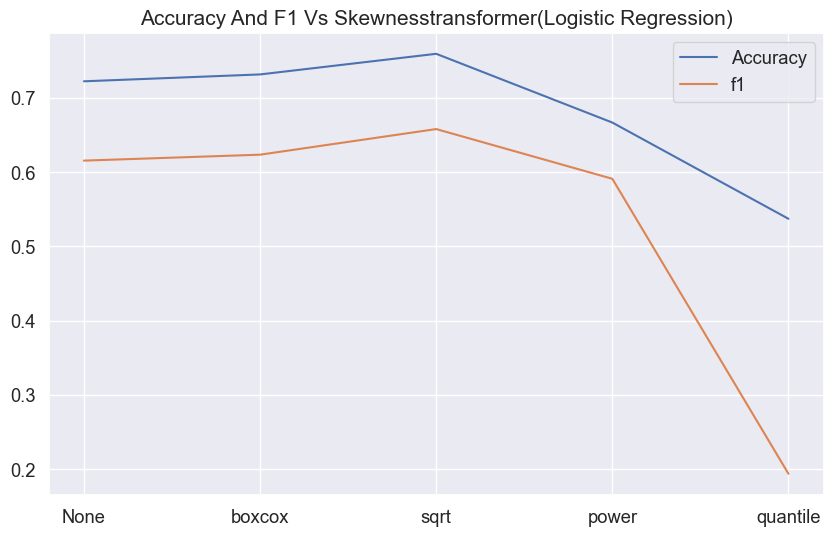

In [130]:
plt.figure(figsize=(10,6))

plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_accuracy_scores.values()), label='Accuracy')
plt.plot(['None', 'boxcox', 'sqrt', 'power', 'quantile'], list(method_f1_scores.values()), label='f1')

plt.title('Accuracy and F1 vs SkewnessTransformer(Logistic Regression)'.title(), fontsize=15)
plt.legend();


In [131]:
# setting skewness transformation method to 'sqrt' 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('skewness_transformer', SkewnessTransformer(method='sqrt', columns=['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])),
            ('drop_attr', DropAttribute(attribute_names='total_volume_donated_(c.c.)')),
            ('scaler', StandardScaler()),
        ]), ['months_since_last_donation', 'number_of_donations', 'total_volume_donated_(c.c.)', 'months_since_first_donation'])
    ])

# Train_set
X_train_transformed = preprocessor.fit_transform(X_train)

# Test_set
X_test_transformed = preprocessor.transform(X_test)

# SMOTE
X_smote, y_smote= smote.fit_resample(X_train_transformed, y_train)


In [132]:
logreg_before_tuning = LogisticRegression()
logreg_before_tuning.fit(X_smote, y_smote)
y_pred_log = logreg_before_tuning.predict(X_test_transformed)

In [133]:
check_result(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        74
           1       0.60      0.74      0.66        34

    accuracy                           0.76       108
   macro avg       0.73      0.75      0.74       108
weighted avg       0.78      0.76      0.77       108

Accuracy 0.7592592592592593
precision 0.5952380952380952
F1 score 0.6578947368421053
ROC AUC score 0.7527821939586645
Confusion matrix
[[57 17]
 [ 9 25]]


ROC AUC Score is:  0.7087960208870381


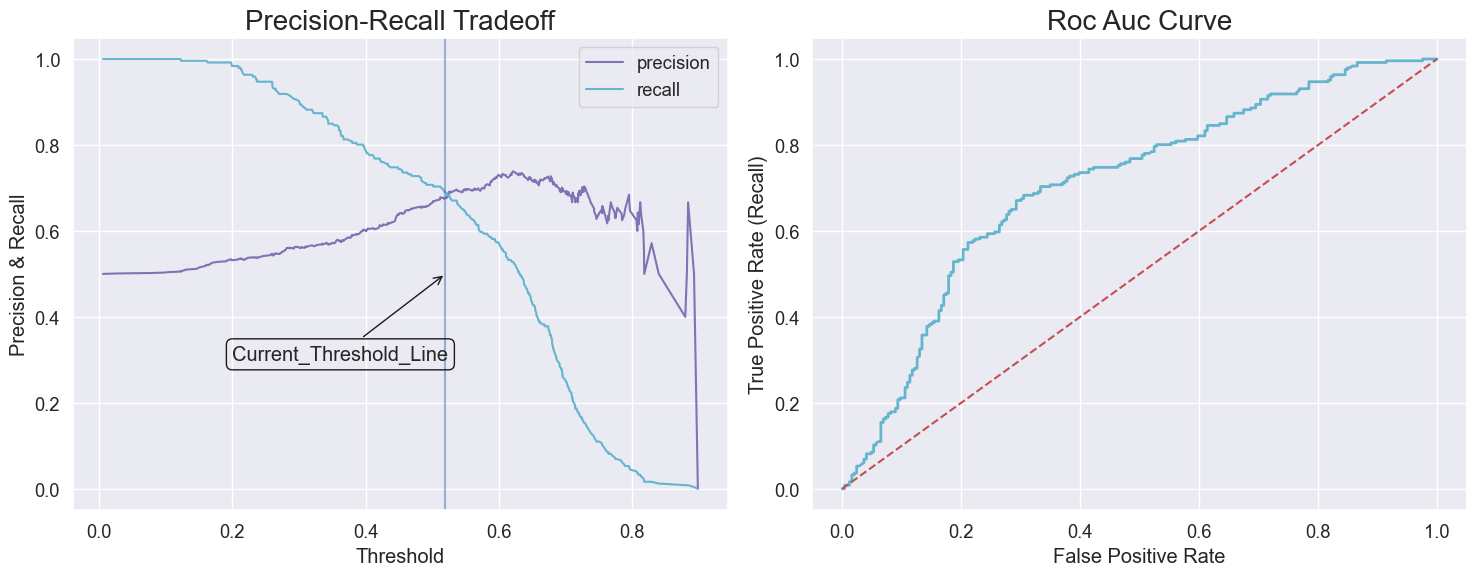

In [134]:
check_tradeoffs(logreg_before_tuning, X_smote, y_smote, cv=5, threshold_proba=0.52)

Max F1 score is:  0.6578947368421053
Optimum threshold is:  0.5


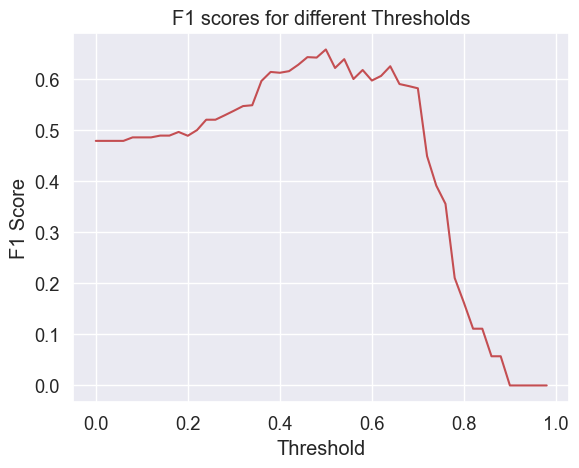

In [135]:
# finding optimum threshold value for LogisticRegression classifier
logreg_threshold = LogisticRegression()
opt_threshold(logreg_threshold, train_features=X_smote, train_labels=y_smote, test_features=X_test_transformed, test_labels=y_test)

In [136]:
# Defining the logistic regression model
logreg = LogisticRegression()

# Defining the hyperparameters to tune
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Defining the scoring metric to optimize for (precision score)
scorer = make_scorer(precision_score)

# Defining the grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=parameters, scoring=scorer, cv=3, n_jobs=-1, verbose=0)

# Fitting the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# getting best model and its parameters
best_model_log = grid_search.best_estimator_
best_params_log = grid_search.best_params_

# evaluating best model on test set with optimum threshold
y_pred = (best_model_log.predict_proba(X_test_transformed)[:, 1] > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Printing the best hyperparameters
print('Best hyperparameters:', best_params_log)


              precision    recall  f1-score   support

           0       0.84      0.70      0.76        74
           1       0.52      0.71      0.60        34

    accuracy                           0.70       108
   macro avg       0.68      0.70      0.68       108
weighted avg       0.74      0.70      0.71       108

[[52 22]
 [10 24]]
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


<font color=darkviolet>It looks like the hyperparameter tuning has slightly decreased the overall performance of the LogisticRegression model. The accuracy has decreased from 0.76 to 0.70, and the f1-score has decreased from 0.66 to 0.60 for the positive class. The precision and recall scores for the positive class have also decreased from 0.60 and 0.74 to 0.52 and 0.71, respectively.

In [137]:
data_subset= X_test_transformed[10:60]
label_subset= y_test[10:60]

In [138]:
result= (svc_threshold.predict_proba(data_subset)[:, 1] > 0.44).astype(int)

In [139]:
check_result(label_subset, result)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.68      0.81      0.74        16

    accuracy                           0.82        50
   macro avg       0.79      0.82      0.80        50
weighted avg       0.83      0.82      0.82        50

Accuracy 0.82
precision 0.6842105263157895
F1 score 0.742857142857143
ROC AUC score 0.8180147058823529
Confusion matrix
[[28  6]
 [ 3 13]]


ROC AUC Score is:  0.7279411764705882


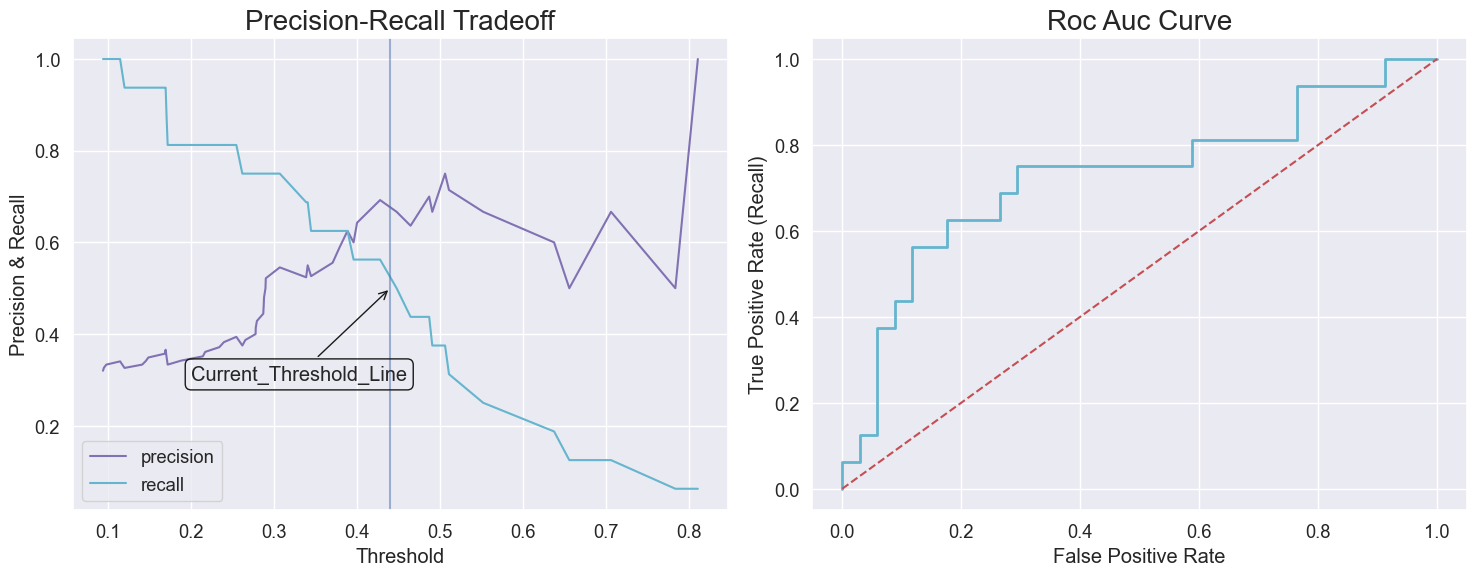

In [140]:
check_tradeoffs(svc_threshold, X=data_subset, y=label_subset, cv=5, threshold_proba=0.44)

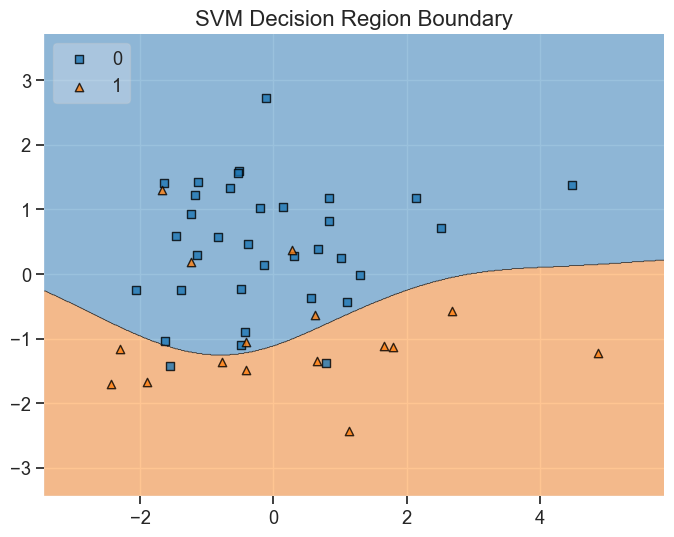

In [141]:
svc_cloned= clone(svc_threshold)

pca = PCA(n_components = 2)
data_subset2 = pca.fit_transform(data_subset)
svc_cloned.fit(data_subset2, label_subset)

plt.figure(figsize=(8,6))
plot_decision_regions(data_subset2, np.array(label_subset), clf=svc_cloned, legend=2)

plt.title('SVM Decision Region Boundary', size=16);

In [142]:
# dumping model
pickle.dump(svc_threshold, open("svc_model.pkl", "wb"))

In [143]:
X_train_new= X_train.drop('total_volume_donated_(c.c.)', axis=1)

In [144]:
skewness_transformer= SkewnessTransformer(method='sqrt')
X_train_new=skewness_transformer.transform(X_train_new)

In [145]:
X_train_new_scaled=scaler.fit_transform(X_train_new)

In [146]:
# sample data points to test
donation.sample(5)

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
101,2,4,1000,26,0
95,1,7,1750,57,0
447,2,1,250,2,0
124,2,1,250,2,0
8,5,46,11500,98,1


In [147]:
#user input

#query = [months_since_last_donation, months_since_first_donation, number_of_donations]
query= np.array([11,72,8])

# Preprocessing
query_list= list(query)
query_sqrt= np.array([np.sqrt(x) for x in query_list]).reshape(1,-1)
query_scaled=scaler.transform(query_sqrt)

#prediction
prob=(svc_threshold.predict_proba(query_scaled)[:, 1])
answer= (prob > 0.44).astype(int)

if answer ==1:
    print("Donor is likely to donate in March 2007")

else:
    print("Donor is unlikely to donate in March 2007")

Donor is unlikely to donate in March 2007
